In [ ]:
!gdown --id 13Dwwf-doJk6iMeViyKsy-mR0erPkR0w6

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13Dwwf-doJk6iMeViyKsy-mR0erPkR0w6
To: /content/anotherdataset.zip
100% 188M/188M [00:04<00:00, 40.0MB/s]


In [ ]:
!unzip /content/anotherdataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_TgS_FL 9777.JPG  
  inflating: tomato/train/Tomato___Target_Spot/03002b91-afe3-4c72-86b

In [ ]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import keras
from keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, Reshape, LSTM
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.applications import MobileNetV2

In [ ]:
dir = '/content/tomato/train'
labels = os.listdir(dir)
labels

['Tomato___Bacterial_spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Leaf_Mold',
 'Tomato___Target_Spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Early_blight',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Septoria_leaf_spot']

In [ ]:
for label in labels:
    print(label, len(os.listdir(dir+'/'+label)))

Tomato___Bacterial_spot 1000
Tomato___Tomato_mosaic_virus 1000
Tomato___Leaf_Mold 1000
Tomato___Target_Spot 1000
Tomato___Spider_mites Two-spotted_spider_mite 1000
Tomato___Early_blight 1000
Tomato___Tomato_Yellow_Leaf_Curl_Virus 1000
Tomato___healthy 1000
Tomato___Late_blight 1000
Tomato___Septoria_leaf_spot 1000


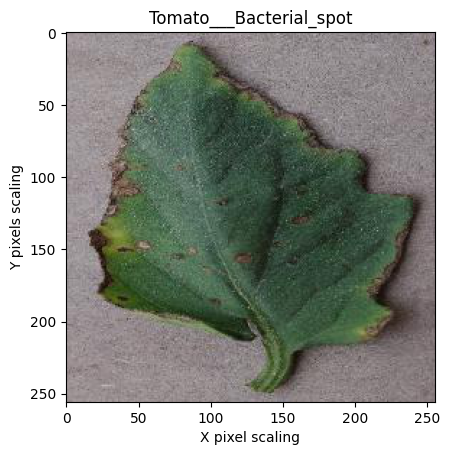

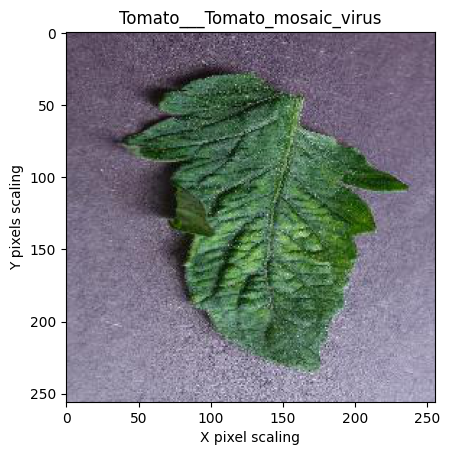

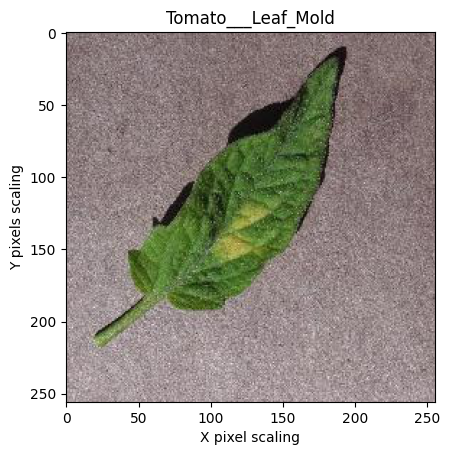

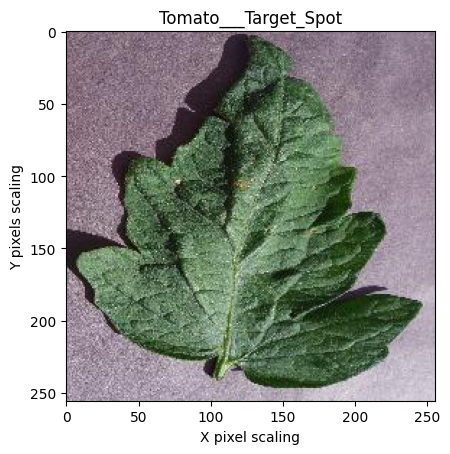

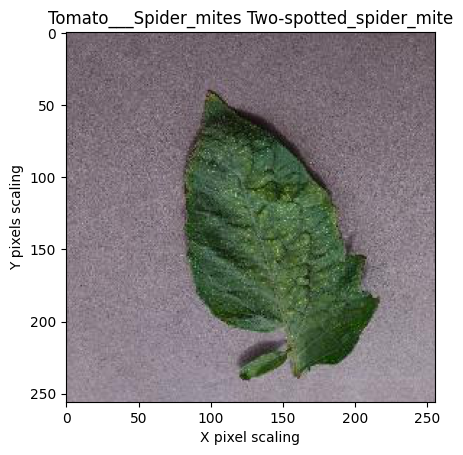

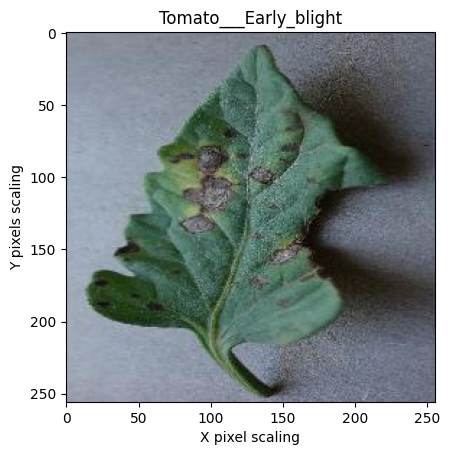

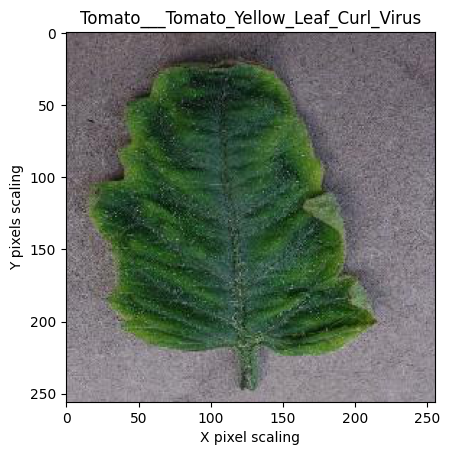

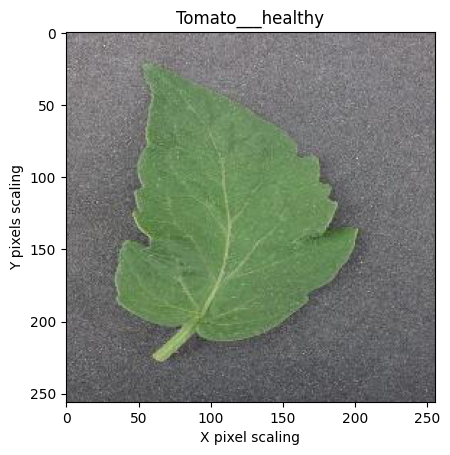

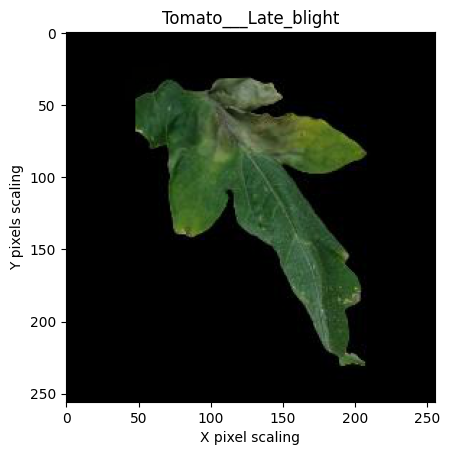

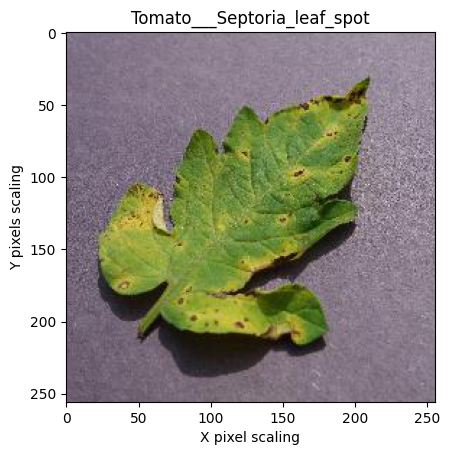

In [ ]:
for label in labels:
    path = os.listdir(dir + '/' + label)
    img = dir + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

In [ ]:
datagen = ImageDataGenerator(
    samplewise_center=True, 
    rotation_range=10, 
    zoom_range = 0.1, 
    width_shift_range=0.1,
    height_shift_range=0.1,  
    horizontal_flip=True, 
    vertical_flip=False,
    rescale=1./255,
    validation_split=0.20
)

train_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)
test_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    shuffle=False,
    subset='validation'
)
validation_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    shuffle=False,
    subset='validation'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


Found 10000 images belonging to 10 classes.


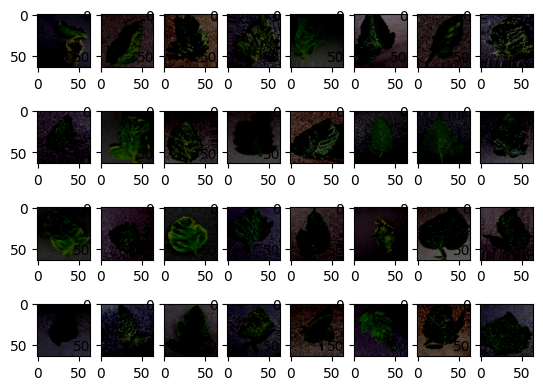

In [ ]:
img_iter = datagen.flow_from_directory(dir,
                                       target_size=(64,64),
                                       batch_size=32)
x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(32):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

# Custom CNN Model

In [ ]:
model=Sequential()
size=(64,64,3)
model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=size))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Compiling the model
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

#Training the model
base_model=model.fit(train_data, epochs=50, steps_per_epoch=len(train_data), validation_data=validation_data, validation_steps=len(validation_data))

Epoch 1/50
250/250 [==============================] - 54s 211ms/step - loss: 1.6278 - accuracy: 0.4125 - val_loss: 1.2136 - val_accuracy: 0.5790
Epoch 2/50
250/250 [==============================] - 53s 210ms/step - loss: 1.0383 - accuracy: 0.6376 - val_loss: 0.9836 - val_accuracy: 0.6580
Epoch 3/50
250/250 [==============================] - 54s 215ms/step - loss: 0.8524 - accuracy: 0.7011 - val_loss: 0.8336 - val_accuracy: 0.7065
Epoch 4/50
250/250 [==============================] - 54s 217ms/step - loss: 0.7516 - accuracy: 0.7287 - val_loss: 0.7180 - val_accuracy: 0.7410
Epoch 5/50
250/250 [==============================] - 52s 207ms/step - loss: 0.6679 - accuracy: 0.7655 - val_loss: 0.7583 - val_accuracy: 0.7250
Epoch 6/50
250/250 [==============================] - 54s 216ms/step - loss: 0.6203 - accuracy: 0.7788 - val_loss: 0.6650 - val_accuracy: 0.7660
Epoch 7/50
250/250 [==============================] - 52s 209ms/step - loss: 0.5767 - accuracy: 0.7947 - val_loss: 0.5835 - val_ac

In [ ]:
print(base_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


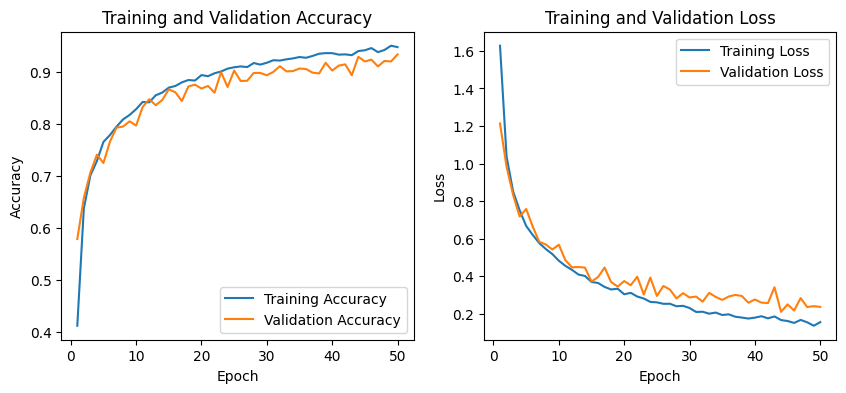

In [ ]:
acc = base_model.history['accuracy']
val_acc = base_model.history['val_accuracy']
loss = base_model.history['loss']
val_loss = base_model.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

63/63 [==============================] - 8s 120ms/step - loss: 0.2476 - accuracy: 0.9185
Test loss: 0.24759097397327423
Test accuracy: 0.9185000061988831


In [ ]:
# Evaluate the model on the train, test, and validation data
train_acc = model.evaluate(train_data, verbose=0)[1]
test_acc = model.evaluate(test_data, verbose=0)[1]
val_acc = model.evaluate(validation_data, verbose=0)[1]

# Print out the validation accuracies for the train, test, and validation data
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)
print('Validation accuracy:', val_acc)


Train accuracy: 0.9520000219345093
Test accuracy: 0.921999990940094
Validation accuracy: 0.9290000200271606


In [ ]:
predict=model.predict(test_data)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

63/63 [==============================] - 8s 132ms/step


array([0, 0, 0, ..., 9, 9, 9])

Confusion Matrix

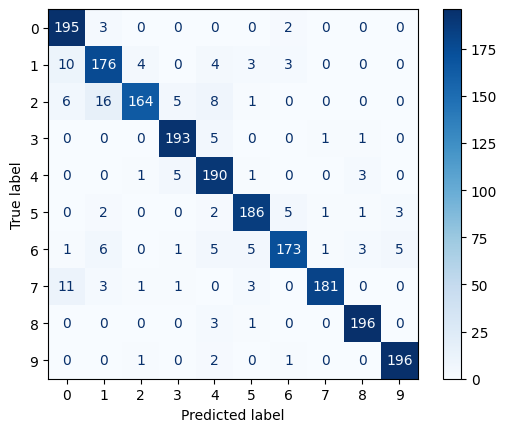

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
cm = confusion_matrix(test_data.classes, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


disp.plot(cmap=plt.cm.Blues)
plt.show();

In [ ]:
print(classification_report(test_data.classes, y_classes))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       200
           1       0.85      0.88      0.87       200
           2       0.96      0.82      0.88       200
           3       0.94      0.96      0.95       200
           4       0.87      0.95      0.91       200
           5       0.93      0.93      0.93       200
           6       0.94      0.86      0.90       200
           7       0.98      0.91      0.94       200
           8       0.96      0.98      0.97       200
           9       0.96      0.98      0.97       200

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.92      2000
weighted avg       0.93      0.93      0.92      2000



# VGG16

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16

# Define the input shape
input_shape = (64, 64, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
base_model=model.fit(train_data, epochs=50, steps_per_epoch=len(train_data), validation_data=validation_data, validation_steps=len(validation_data))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              